In [5]:
import pandas as pd
from matplotlib import pyplot as plt

In [6]:
import os

experiment1_logs = 'experiments/assignment2/logs_experiment2'
experiment2 = {}
for dir in os.listdir(experiment1_logs):
    # configuration = dir[dir.index('_') + 1:]
    configuration = dir
    print(configuration)
    experiment2[configuration] = pd.read_csv(os.path.join(experiment1_logs,dir, "delivery_data.csv"))

g25_SPEP0_SPIP8_IPEP16_ob50
g50_SPEP0_SPIP8_IPEP16_ob50
g10_SPEP0_SPIP8_IPEP16_ob50
g50_SPEP0_SPIP3_IPEP5_ob50
g25_SPEP0_SPIP3_IPEP5_ob50
g10_SPEP0_SPIP3_IPEP5_ob50


g10_SPEP0_SPIP3_IPEP5_ob50 232
g10_SPEP0_SPIP8_IPEP16_ob50 244
g25_SPEP0_SPIP3_IPEP5_ob50 187
g25_SPEP0_SPIP8_IPEP16_ob50 217
g50_SPEP0_SPIP3_IPEP5_ob50 142
g50_SPEP0_SPIP8_IPEP16_ob50 179
g10_SPEP0_SPIP3_IPEP5_ob50 232
g10_SPEP0_SPIP8_IPEP16_ob50 244
g25_SPEP0_SPIP3_IPEP5_ob50 187
g25_SPEP0_SPIP8_IPEP16_ob50 217
g50_SPEP0_SPIP3_IPEP5_ob50 142
g50_SPEP0_SPIP8_IPEP16_ob50 179
['g10_SPEP0_SPIP3_IPEP5_ob50', 'g10_SPEP0_SPIP8_IPEP16_ob50', 'g25_SPEP0_SPIP3_IPEP5_ob50', 'g25_SPEP0_SPIP8_IPEP16_ob50', 'g50_SPEP0_SPIP3_IPEP5_ob50', 'g50_SPEP0_SPIP8_IPEP16_ob50']
[232, 244, 187, 217, 142, 179]


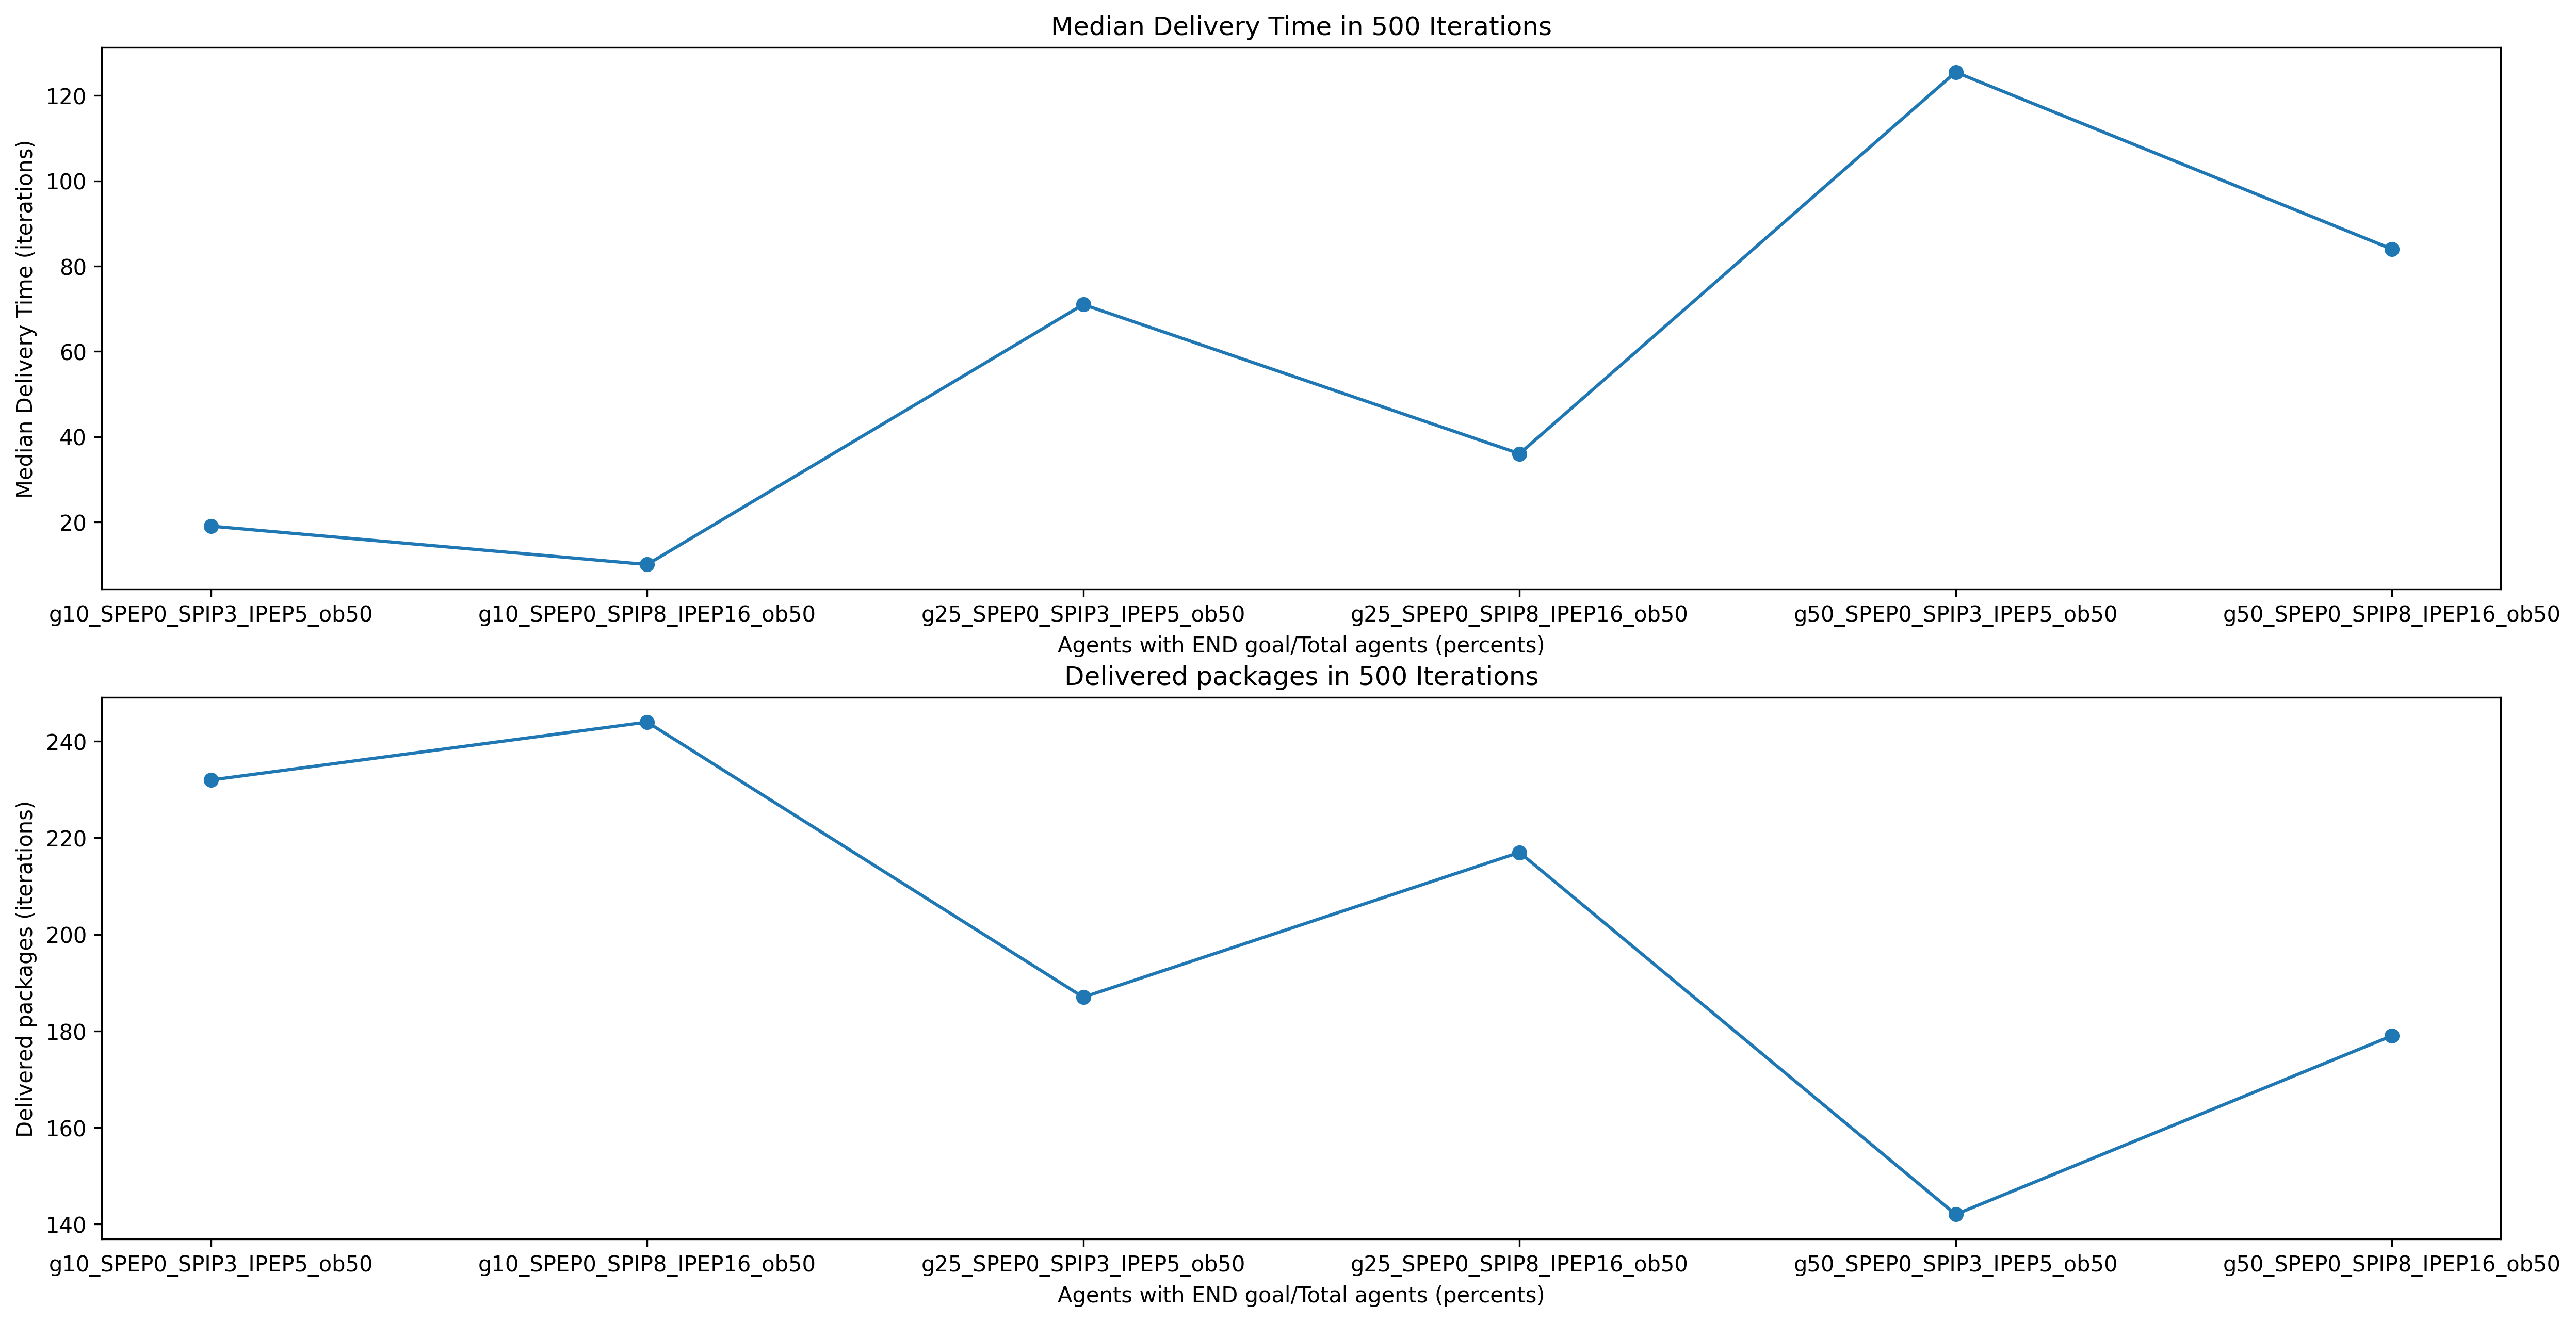

In [7]:
import numpy as np
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
plt.figure(figsize=(20, 10))

plt.subplot(2, 1, 1)
x = []
y = []
for key in sorted(experiment2.keys()):
    x.append(key)
    y.append(experiment2[key]["Delivery Time"].median())
    print(key, len(experiment2[key]["PackagePoint X"]))

plt.plot(x, y, marker='o')
plt.title('Median Delivery Time in 500 Iterations')
plt.ylabel('Median Delivery Time (iterations)')
plt.xlabel('Agents with END goal/Total agents (percents)')

plt.subplot(2, 1, 2)
x = []
y = []
for key in sorted(experiment2.keys()):
    x.append(key)
    y.append(len(experiment2[key]["Delivery Time"]))
    print(key, len(experiment2[key]["PackagePoint X"]))
plt.plot(x, y, marker='o')
plt.title('Delivered packages in 500 Iterations')
plt.ylabel('Delivered packages (iterations)')
plt.xlabel('Agents with END goal/Total agents (percents)')

plt.savefig("experiment12.png")
print(x)
print(y)

g25_ca0_cca8_ra16_ob50_recruiter_loneliest
g25_ca0_cca8_ra16_ob50_recruiter_naive
g10_ca0_cca8_ra16_ob50_recruiter_loneliest
g50_ca0_cca8_ra16_ob50_recruiter_naive
g50_ca0_cca8_ra16_ob50_broker_closer_to_package
g50_ca0_cca8_ra16_ob50_broker_loneliest
g25_ca0_cca8_ra16_ob50_broker_loneliest
g50_ca0_cca8_ra16_ob50_recruiter_loneliest
g25_ca0_cca8_ra16_ob50_broker_closer_to_package
g25_ca0_cca8_ra16_ob50_broker_naive
g10_ca0_cca8_ra16_ob50_recruiter_closer_to_package
g50_ca0_cca8_ra16_ob50_recruiter_closer_to_package
g10_ca0_cca8_ra16_ob50_recruiter_naive
g25_ca0_cca8_ra16_ob50_recruiter_closer_to_package
g50_ca0_cca8_ra16_ob50_broker_naive
g10_ca0_cca8_ra16_ob50_broker_naive
g10_ca0_cca8_ra16_ob50_broker_loneliest
g10_ca0_cca8_ra16_ob50_broker_closer_to_package


Text(0.5, 1.0, 'Median Delivery Time per Configuration')

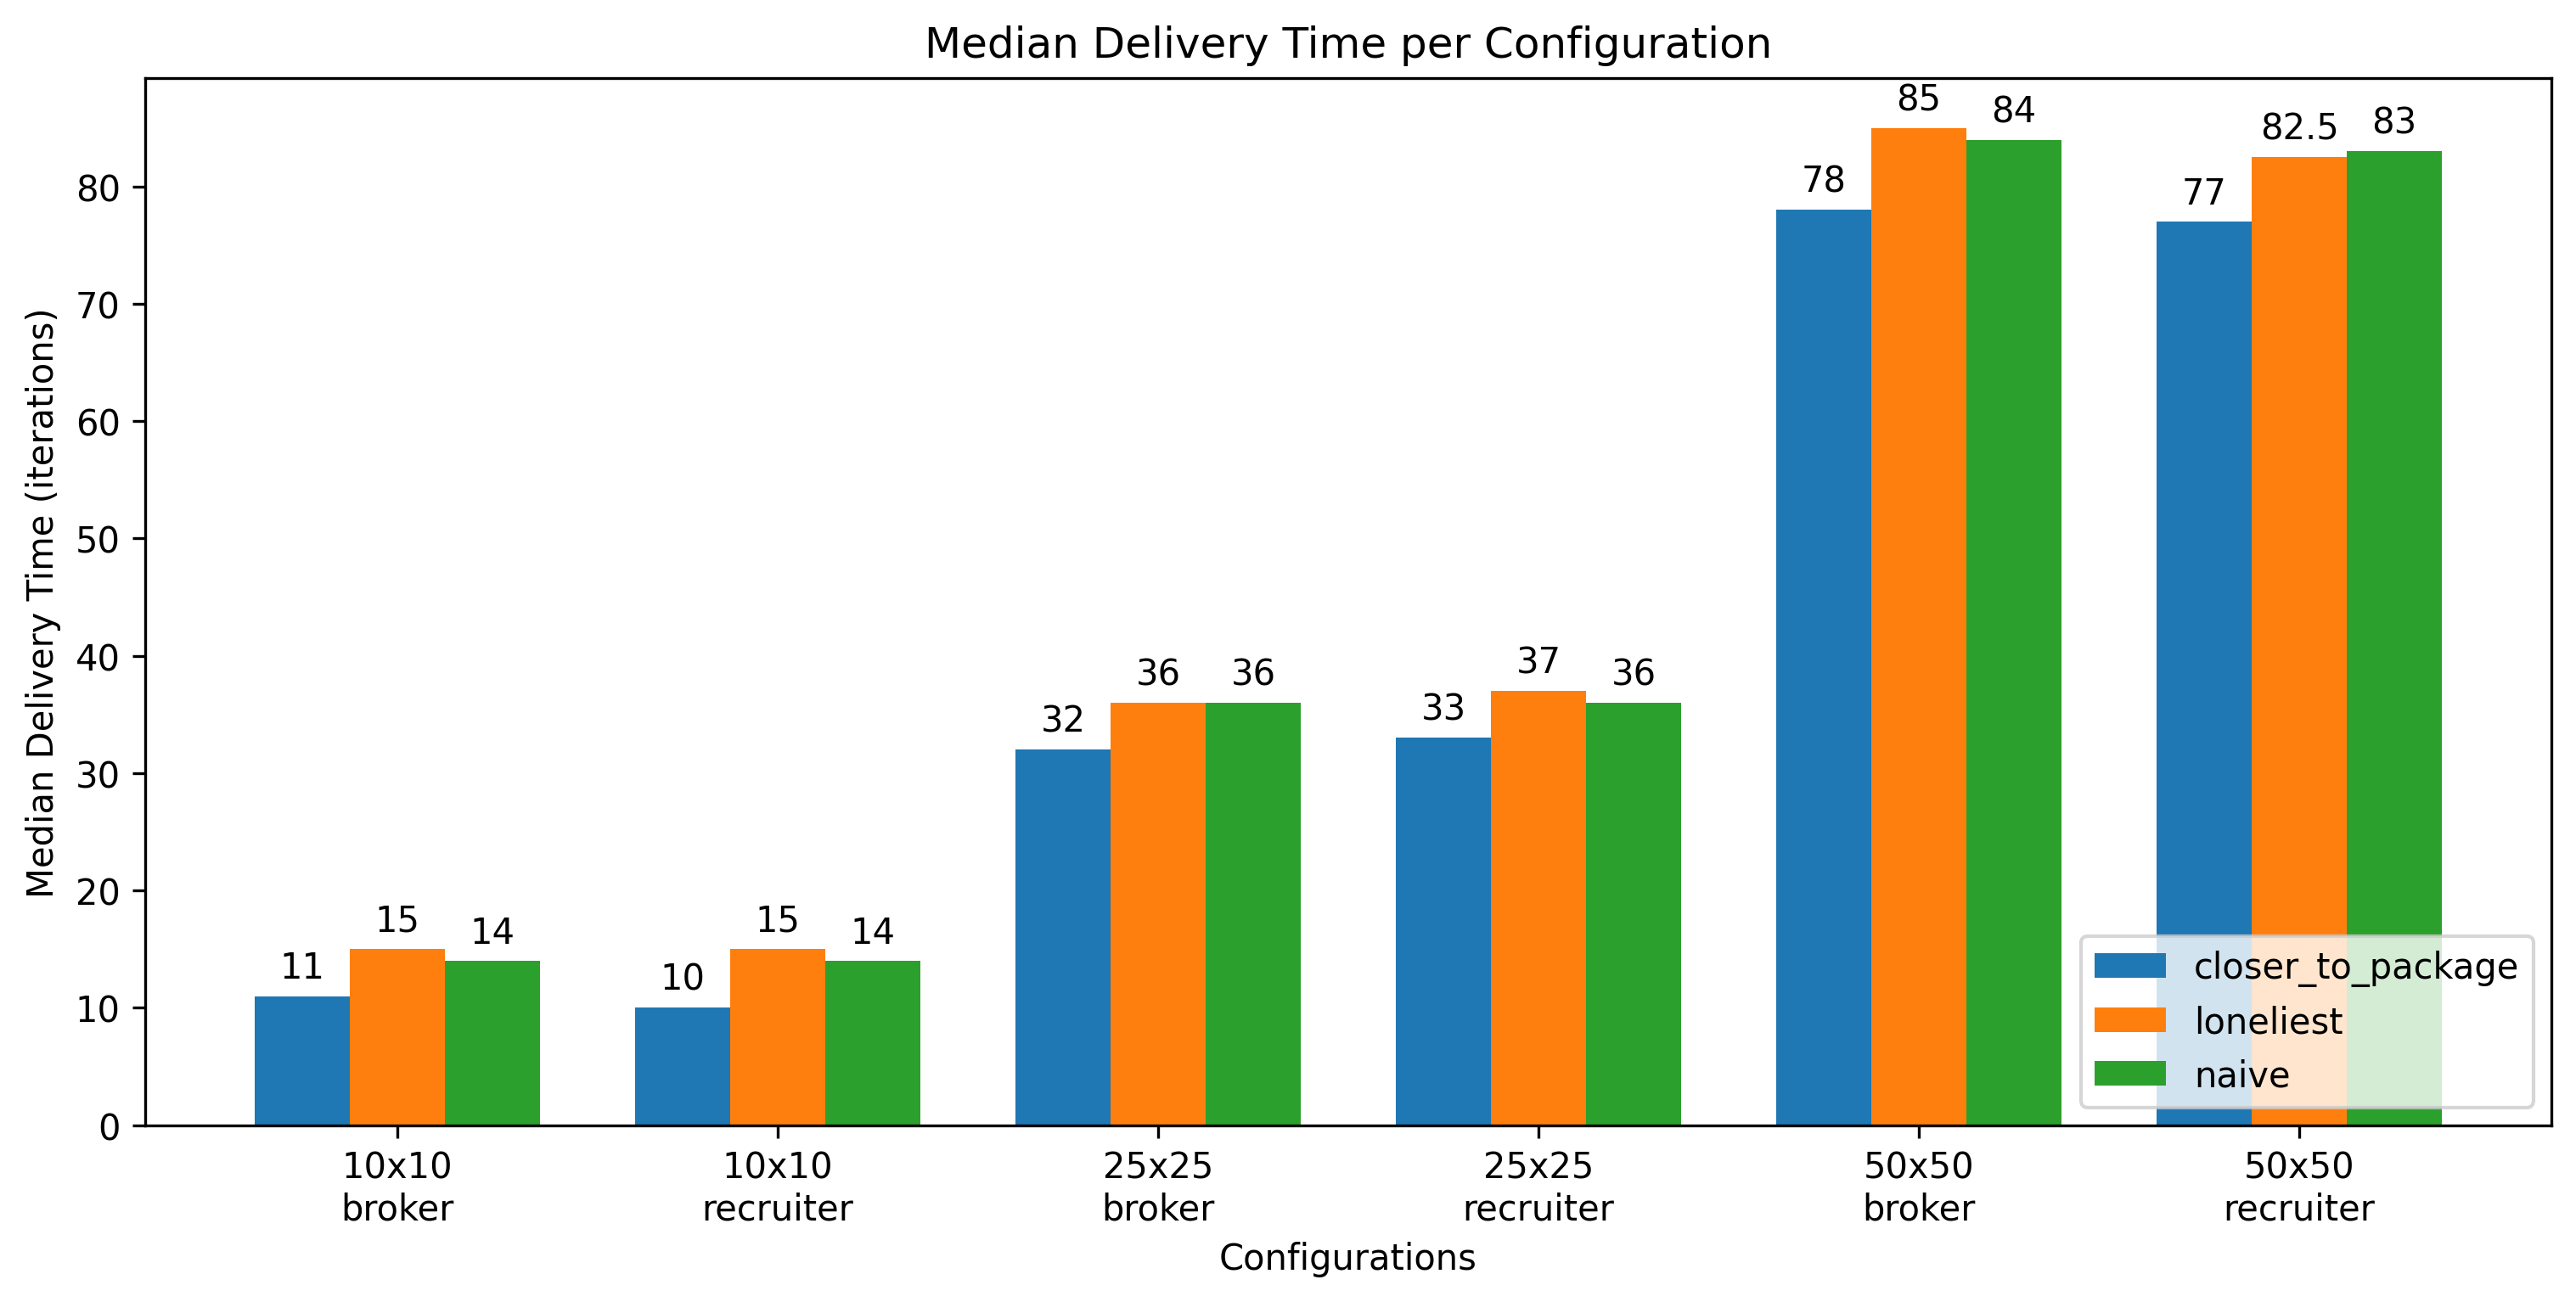

In [30]:
filter_comm = 'cca8_ra16_ob50'

experiment1_logs = 'experiments/assignment2/logs_experiment1/'
experiment1 = {}
for dir in os.listdir(experiment1_logs):
    if filter_comm not in dir:
        continue
    configuration = dir
    
    print(configuration)
    experiment1[configuration] = pd.read_csv(os.path.join(experiment1_logs,dir, "delivery_data.csv"))

# experiment2_logs = 'experiments/assignment2/logs_experiment2/'
# experiment2 = {}
# for dir in os.listdir(experiment2_logs):
#     if filter not in dir:
#         continue
#     configuration = dir
#     print(configuration)
#     experiment2[configuration] = pd.read_csv(os.path.join(experiment1_logs, dir, "delivery_data.csv"))



naive = {config.replace("_naive", "") :result for config, result in experiment1.items() if "naive" in config}
closer_to_package = {config.replace("_closer_to_package", ""):result for config,result in experiment1.items() if "closer_to_package" in config}
loneliest = {config.replace("_loneliest", "") :result for config,result in experiment1.items() if "loneliest" in config}

def translate_configuration(config):
    grid_size = config[config.index("g")+1:config.index("g")+3]
    comm_mech = ""
    if "broker" in config:
        comm_mech = "broker"
    else:
        comm_mech = "recruiter"
    return f"{grid_size}x{grid_size}\n{comm_mech}"

configs = sorted(naive.keys())
naive_delivery_time = (naive[k]["Delivery Time"].median() for k in configs)
closer_to_package_delivery_time = (closer_to_package[k]["Delivery Time"].median() for k in configs)
loneliest_delivery_time = (loneliest[k]["Delivery Time"].median() for k in configs)

plot_data = {
    "naive": list(naive_delivery_time),
    "closer_to_package": list(closer_to_package_delivery_time),
    "loneliest": list(loneliest_delivery_time)
}

x = np.arange(len(configs))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

configs = [translate_configuration(config) for config in configs]
fig, ax = plt.subplots(layout='constrained')
fig.set_figheight(5)
fig.set_figwidth(10)
for attribute in sorted(plot_data.keys()):
    measurement = plot_data[attribute]
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_xticks(x + width, configs)
ax.legend(loc='lower right', ncols=1)
ax.set_xlabel('Configurations')
ax.set_ylabel('Median Delivery Time (iterations)')
ax.set_title("Median Delivery Time per Configuration")
# plt.savefig("experiment22.png")

g50_SPEP0_SPIP8_IPEP16_ob50
g25_SPEP0_SPIP8_IPEP16_ob50
g10_SPEP0_SPIP8_IPEP16_ob50
g25_SPEP0_SPIP8_IPEP16_ob50
g50_SPEP0_SPIP8_IPEP16_ob50
g10_SPEP0_SPIP8_IPEP16_ob50


Text(0.5, 1.0, 'Median Delivery Time per Configuration')

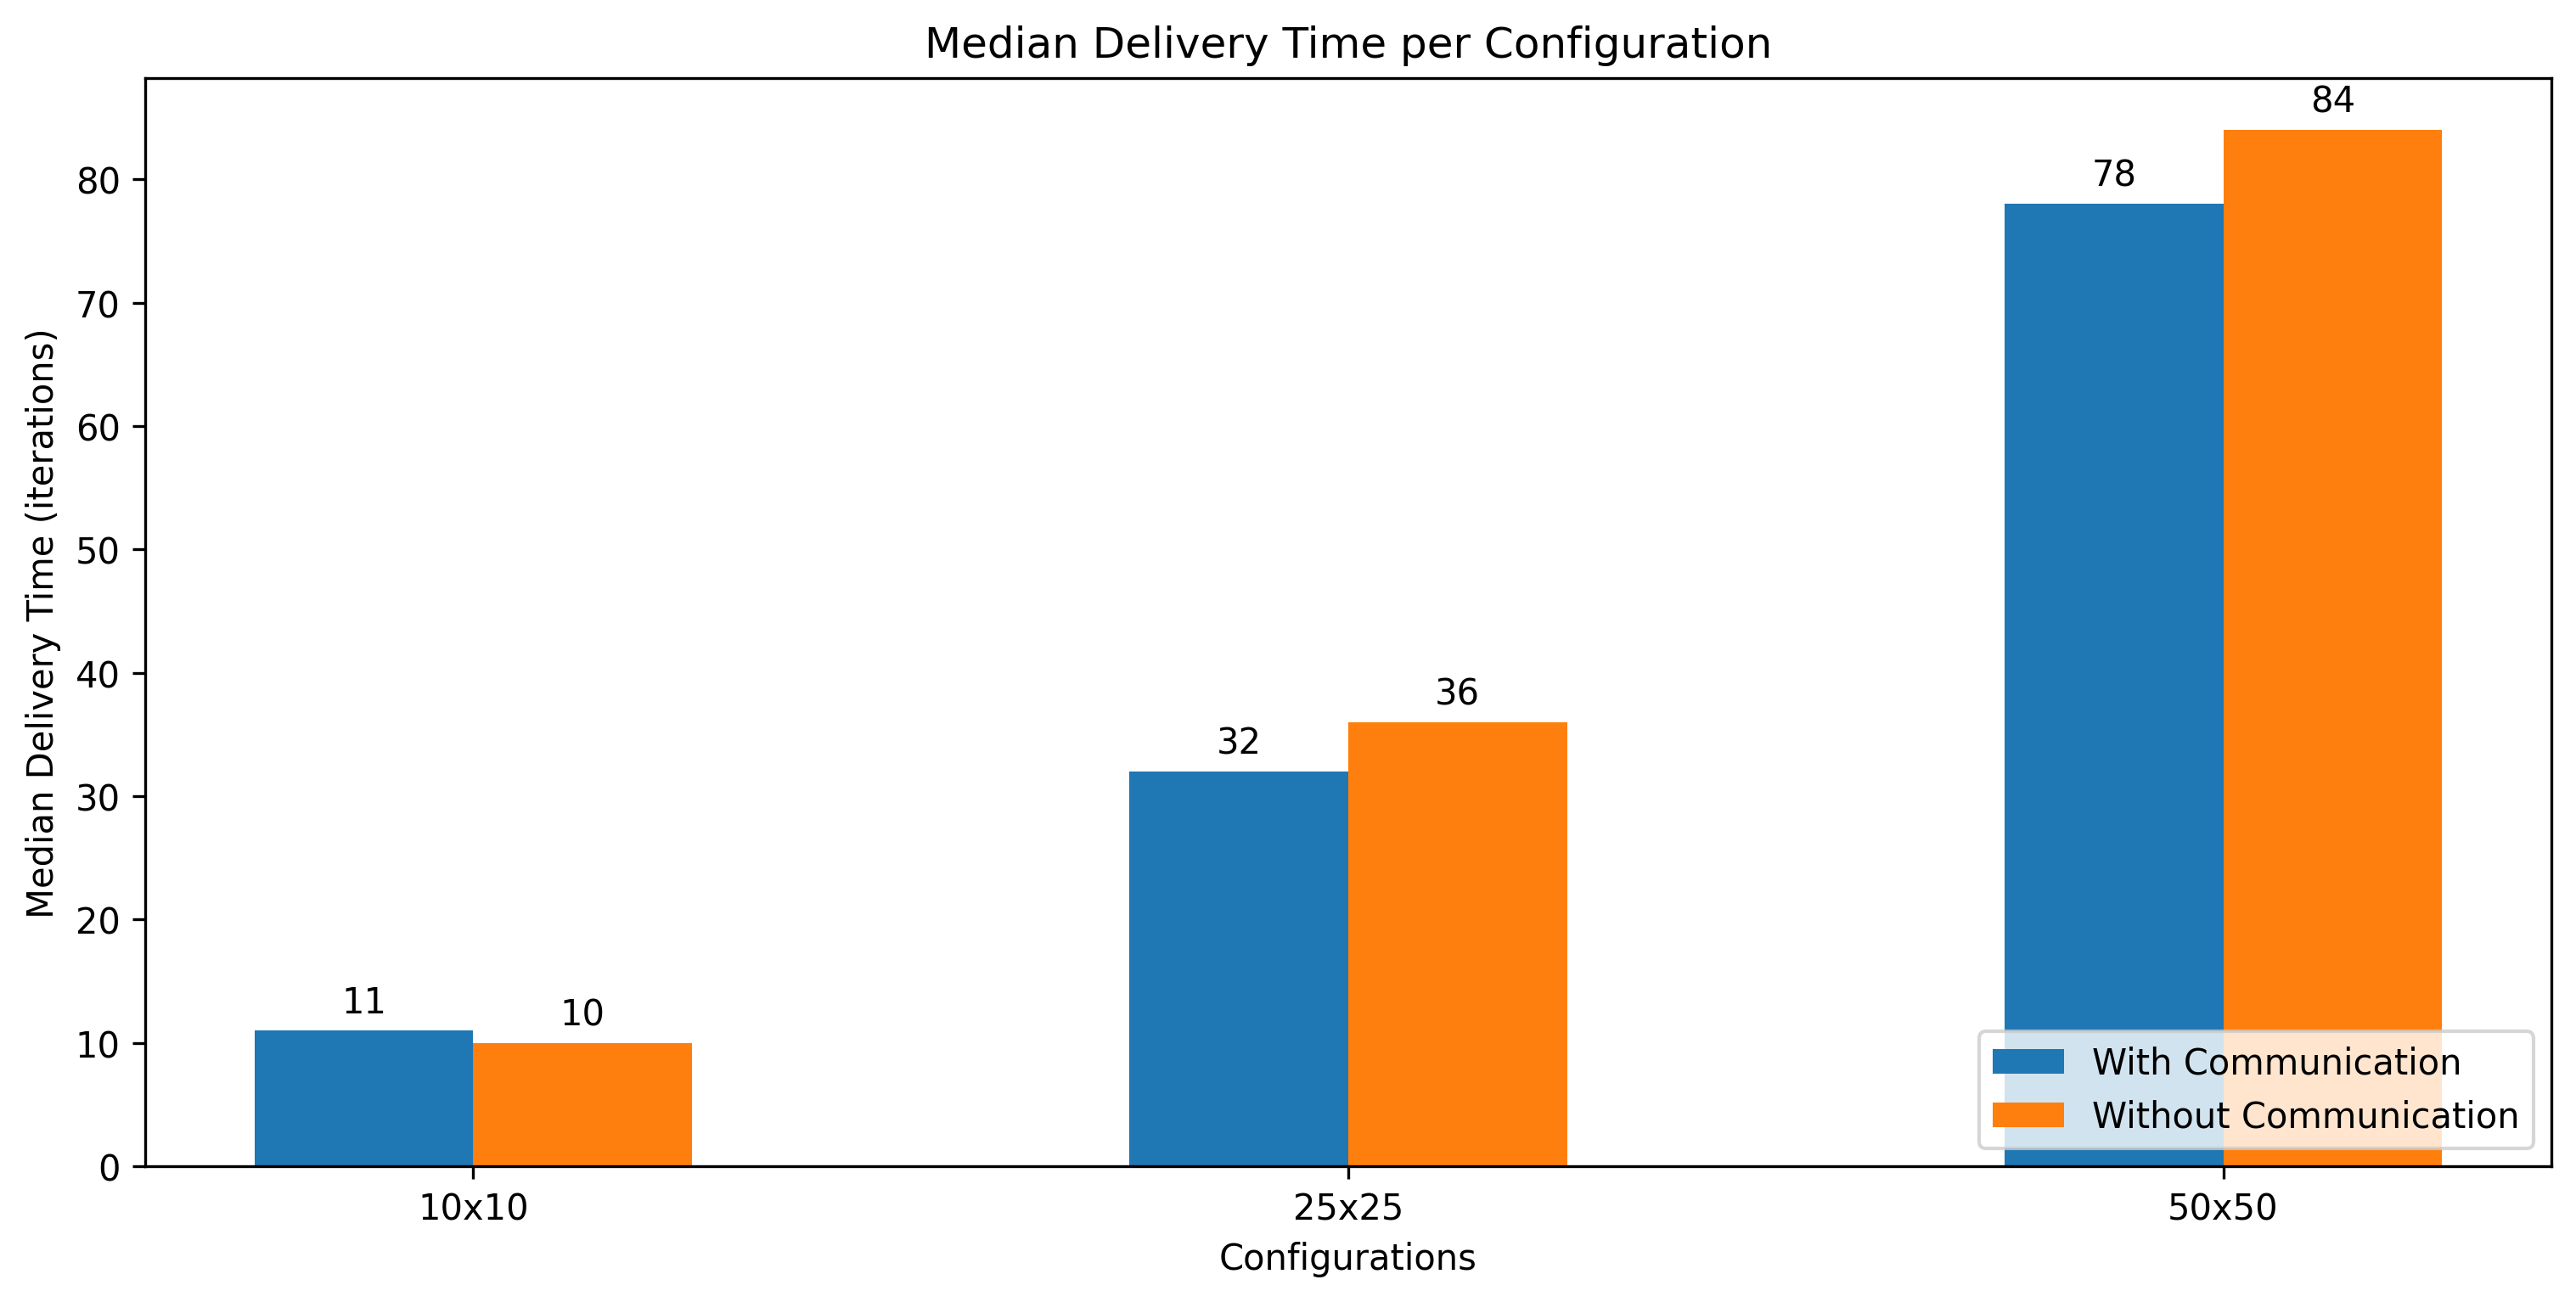

In [54]:
filter_comm = 'broker_closer_to_package'
all_filter = "SPIP8_IPEP16"

experiment1_logs = 'experiments/assignment2/logs_experiment1/'
comm = {}
for dir in os.listdir(experiment1_logs):
    if filter_comm not in dir:
        continue
    configuration = dir.replace("_broker_closer_to_package", "")
    configuration = configuration.replace("ca0", "SPEP0").replace("cca", "SPIP").replace("ra", "IPEP")
    
    if all_filter not in configuration:
        continue
    print(configuration)
    comm[configuration] = pd.read_csv(os.path.join(experiment1_logs,dir, "delivery_data.csv"))

experiment2_logs = 'experiments/assignment2/logs_experiment2/'
no_comm = {}
for dir in os.listdir(experiment2_logs):
    configuration = dir
    if all_filter not in configuration:
        continue
    print(configuration)
    no_comm[configuration] = pd.read_csv(os.path.join(experiment2_logs, dir, "delivery_data.csv"))

def translate_configuration(config):
    grid_size = config[config.index("g")+1:config.index("g")+3]
    # comm_mech = ""
    # if "broker" in config:
    #     comm_mech = "broker"
    # else:
    #     comm_mech = "recruiter"
    return f"{grid_size}x{grid_size}"

configs = sorted(comm.keys())
comm_time = (comm[k]["Delivery Time"].median() for k in configs)
no_comm_time = (no_comm[k]["Delivery Time"].median() for k in configs)

plot_data = {
    "With Communication": list(comm_time),
    "Without Communication": list(no_comm_time),
}

x = np.arange(len(configs))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

configs = [translate_configuration(config) for config in configs]
fig, ax = plt.subplots(layout='constrained')
fig.set_figheight(5)
fig.set_figwidth(10)
for attribute in sorted(plot_data.keys()):
    measurement = plot_data[attribute]
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_xticks(x + 0.5 * width, configs)
ax.legend(loc='lower right', ncols=1)
ax.set_xlabel('Configurations')
ax.set_ylabel('Median Delivery Time (iterations)')
ax.set_title("Median Delivery Time per Configuration")
# plt.savefig("experiment22.png")


In [3]:
from src.visualization.messages import total_number_of_messages, number_of_messages_by_type

total_number_of_messages('experiments/assignment2/logs_experiment1/', 'totalnumber_of_messages.png')
number_of_messages_by_type('experiments/assignment2/logs_experiment1/', 'number_of_messages_by_type.png')